In [1]:
import pywt
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

In [3]:
pywt.wavelist()

['bior1.1',
 'bior1.3',
 'bior1.5',
 'bior2.2',
 'bior2.4',
 'bior2.6',
 'bior2.8',
 'bior3.1',
 'bior3.3',
 'bior3.5',
 'bior3.7',
 'bior3.9',
 'bior4.4',
 'bior5.5',
 'bior6.8',
 'cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'coif1',
 'coif2',
 'coif3',
 'coif4',
 'coif5',
 'coif6',
 'coif7',
 'coif8',
 'coif9',
 'coif10',
 'coif11',
 'coif12',
 'coif13',
 'coif14',
 'coif15',
 'coif16',
 'coif17',
 'db1',
 'db2',
 'db3',
 'db4',
 'db5',
 'db6',
 'db7',
 'db8',
 'db9',
 'db10',
 'db11',
 'db12',
 'db13',
 'db14',
 'db15',
 'db16',
 'db17',
 'db18',
 'db19',
 'db20',
 'db21',
 'db22',
 'db23',
 'db24',
 'db25',
 'db26',
 'db27',
 'db28',
 'db29',
 'db30',
 'db31',
 'db32',
 'db33',
 'db34',
 'db35',
 'db36',
 'db37',
 'db38',
 'dmey',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'haar',
 'mexh',
 'morl',
 'rbio1.1',
 'rbio1.3',
 'rbio1.5',
 'rbio2.2',
 'rbio2.4',
 'rbio2.6',
 'rbio2.8',
 'rbio3.1',

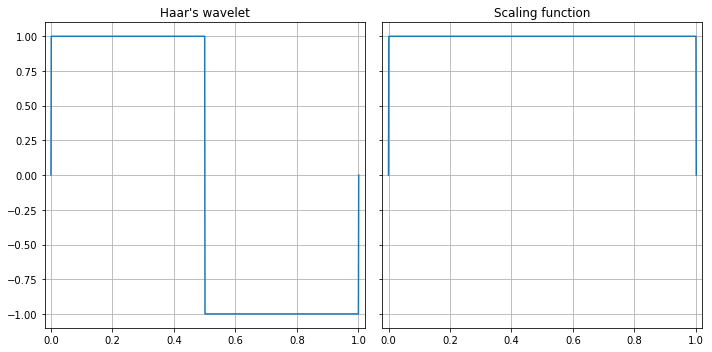

In [4]:
w = pywt.Wavelet('Haar')
scaling, wavelet, x = w.wavefun(level=10)
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,5))
ax1, ax2 = axes

ax1.set_xlim(-.02,1.02)
ax1.plot(x, wavelet)
ax1.grid(True)
ax1.set_title("Haar's wavelet")

ax2.set_xlim(-.02,1.02)
ax2.plot(x, scaling)
ax2.tick_params(labelleft=False)
ax2.grid(True)
ax2.set_title("Scaling function")


fig.tight_layout()

plt.show()

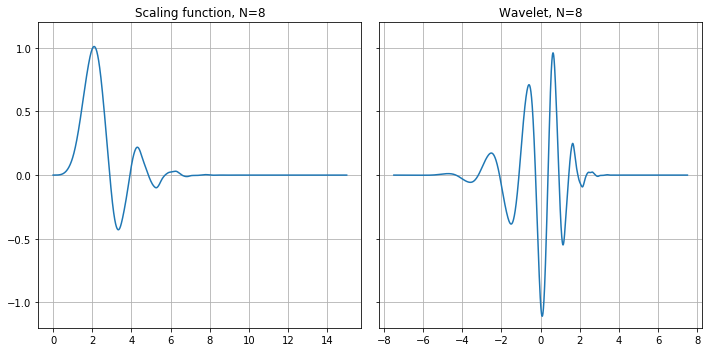

In [5]:
db8 = pywt.Wavelet('db8')
scaling, wavelet, x = db8.wavefun()

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(10,5))
ax1, ax2 = axes

ax1.plot(x, scaling)
ax1.grid(True)
ax1.set_title('Scaling function, N=8')
ax1.set_ylim(-1.2, 1.2)

ax2.set_title('Wavelet, N=8');
ax2.tick_params(labelleft=False)
ax2.grid(True)
ax2.plot(x-x.mean(), wavelet)

fig.tight_layout()

In [6]:
signal = sio.loadmat("131 rem1.mat")

In [7]:
signal = np.asarray(signal["eeg4"][0])

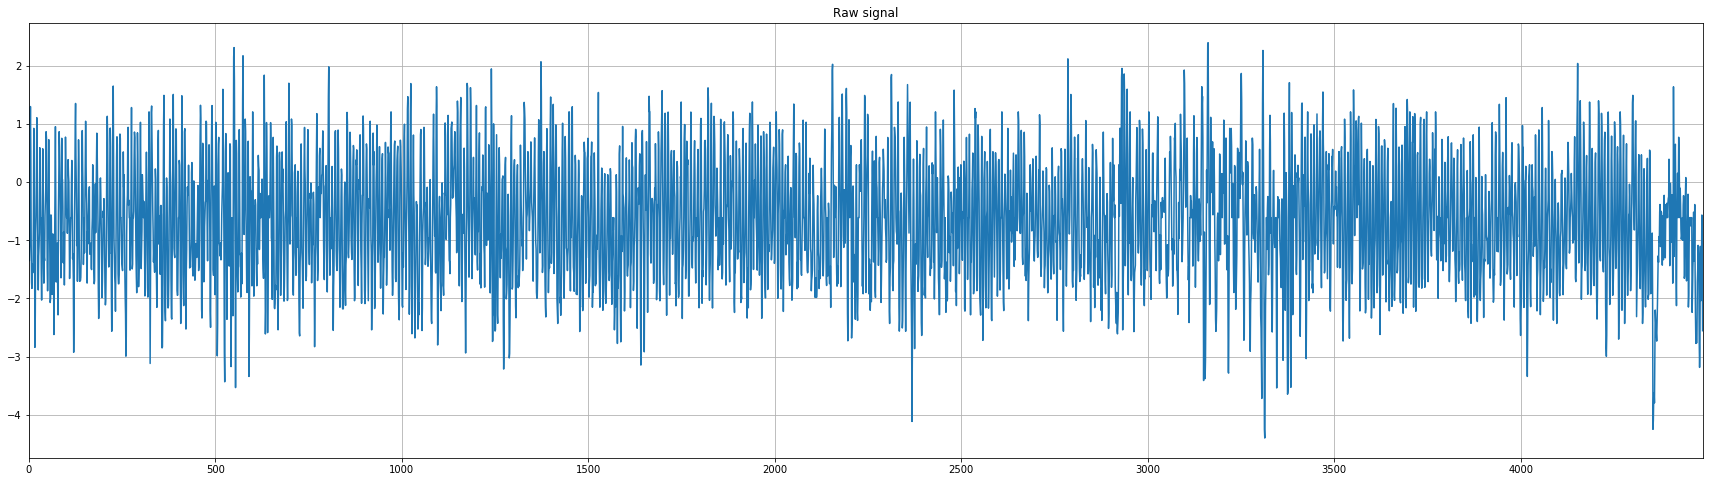

In [8]:
fig = plt.figure(figsize=(30,8))
plt.plot(signal)
plt.title("Raw signal")
plt.xlim([0,len(signal)])
plt.grid(True)
plt.show()

In [9]:
coeffs = pywt.wavedec(signal, 'db8', level = 8)


In [10]:
from statsmodels.robust import mad

sigma = mad(coeffs[-1])
uthresh = sigma*np.sqrt(2*np.log(len(signal)))

denoised = coeffs[:]

denoised[1:] = (pywt.threshold(i, value=uthresh,  mode='soft') for i in denoised[1:])


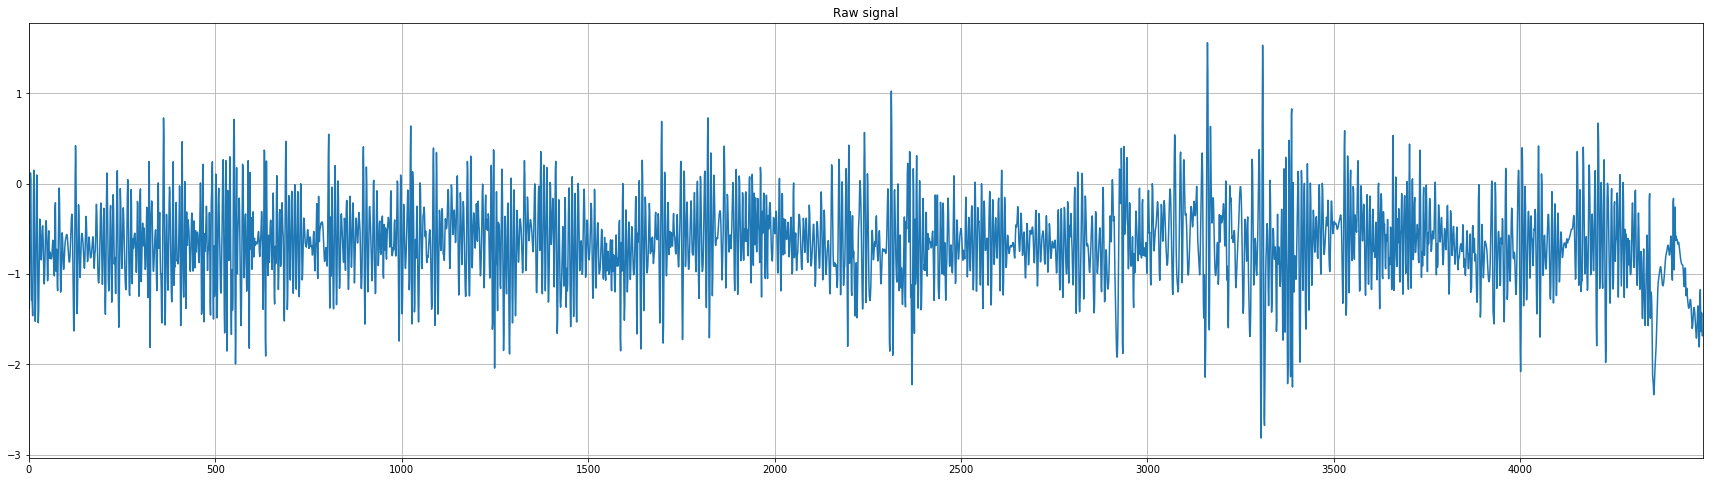

In [14]:
signal2 = pywt.waverec(denoised, 'db8')

fig = plt.figure(figsize=(30,8))
plt.plot(signal2)
plt.title("Raw signal")
plt.xlim([0,len(signal2)])
plt.grid(True)
plt.show()

In [15]:
signal[:10]

array([-1.2782, -1.3529, -1.1076,  0.6222,  1.3004,  0.5262, -1.0578,
       -1.7289, -1.8284, -1.4089])

In [16]:
signal2[:10]

array([-1.36335158, -1.38230866, -0.96051667, -0.3769509 ,  0.11854067,
        0.03852933, -0.73023133, -1.28632546, -1.27109749, -1.33803365])

In [35]:
def coef_pyramid_plot(coefs, first=0, scale='level', ax=None):
    """
    Parameters
    ----------
    coefs : array-like
        Wavelet Coefficients. Expects an iterable in order Cdn, Cdn-1, ...,
        Cd1, Cd0.
    first : int, optional
        The first level to plot.
    scale : str {'uniform', 'level'}, optional
        Scale the coefficients using the same scale or independently by
        level.
    ax : Axes, optional
        Matplotlib Axes instance

    Returns
    -------
    Figure : Matplotlib figure instance
        Either the parent figure of `ax` or a new pyplot.Figure instance if
        `ax` is None.
    """

    if ax is None:
        import matplotlib.pyplot as plt
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111, facecolor ='#0F0F0F0F')
    else:
        fig = ax.figure

    n_levels = len(coefs)
    n = 2**(n_levels - 1) # assumes periodic

    if scale == 'uniform':
        biggest = [np.max(np.abs(np.hstack(coefs)))] * n_levels
    else:
        # multiply by 2 so the highest bars only take up .5
        biggest = [np.max(np.abs(i))*2 for i in coefs]

    for i in range(first,n_levels):
        x = np.linspace(2**(n_levels - 2 - i), n - 2**(n_levels - 2 - i), 2**i)
        ymin = n_levels - i - 1 + first
        yheight = coefs[i]/biggest[i]
        ymax = yheight + ymin
        ax.vlines(x, ymin, ymax, linewidth=1.1)

    ax.set_xlim(0,n)
    ax.set_ylim(first - 1, n_levels)
    ax.yaxis.set_ticks(np.arange(n_levels-1,first-1,-1))
    ax.yaxis.set_ticklabels(np.arange(first,n_levels))
    ax.tick_params(top=False, right=False, direction='out', pad=6)
    ax.set_ylabel("Levels", fontsize=20)
    ax.grid(True, alpha=.85, color='white', axis='y', linestyle='-')
    ax.set_title('Wavelet Detail Coefficients', fontsize=20,
            position=(.5,1.05))
    fig.subplots_adjust(top=.89)

    return fig

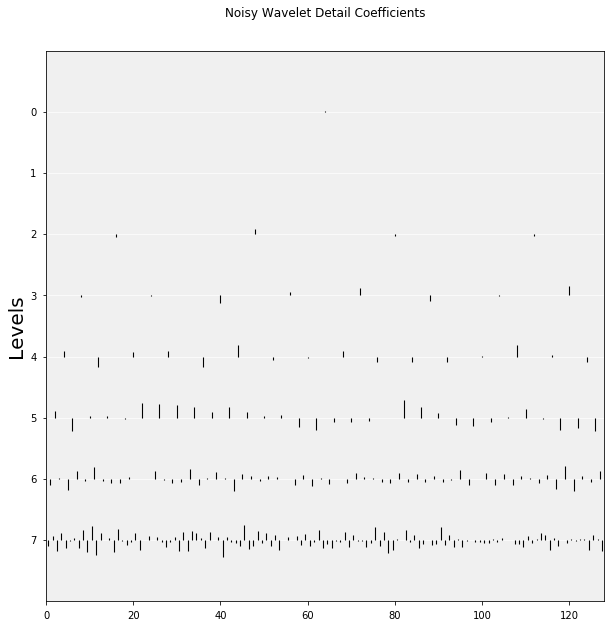

In [36]:

fig.tight_layout()
fig = plt.figure()

fig = coef_pyramid_plot(coeffs[1:]) 
plt.title("Noisy Wavelet Detail Coefficients")

plt.show()

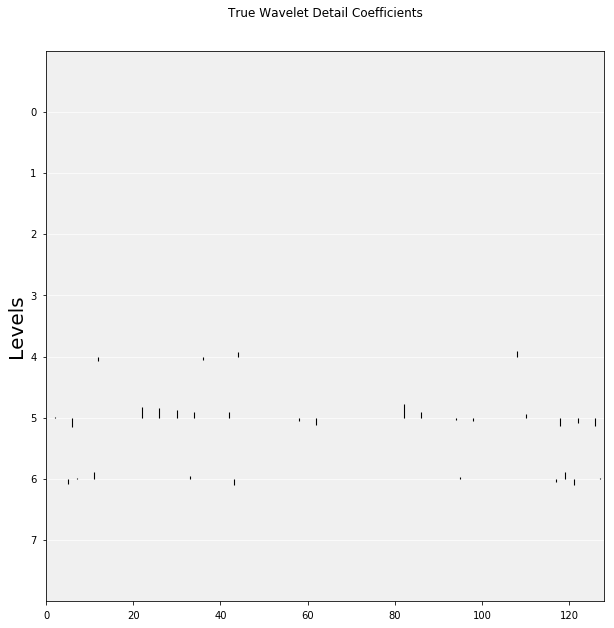

In [37]:
fig.tight_layout()
fig = plt.figure()

fig = coef_pyramid_plot(denoised[1:]) 
plt.title("True Wavelet Detail Coefficients")

plt.show()

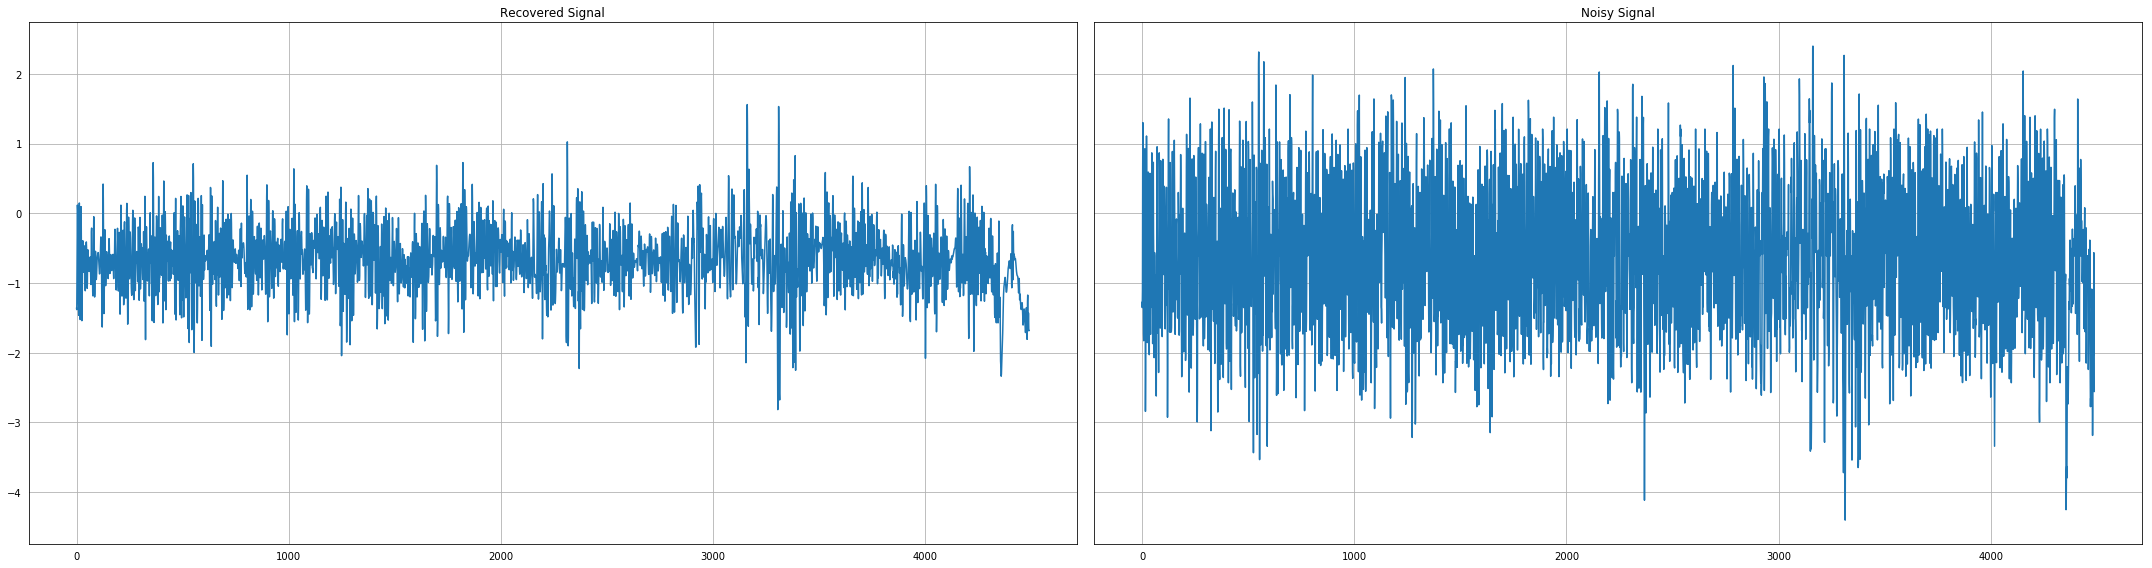

In [40]:
fig, axes = plt.subplots(1, 2, sharey=True, sharex=True,
                         figsize=(30,8))
ax1, ax2 = axes

ax1.plot(signal2)

ax1.set_title("Recovered Signal")
ax1.grid(True)
ax1.margins(.1)

ax2.plot(signal)
ax2.grid(True)
ax2.set_title("Noisy Signal")

for ax in fig.axes:
    ax.tick_params(labelbottom=True, top=False, bottom=False, left=False, 
                 right=False)
    
fig.tight_layout()